# 1. Math Drills

Give an example of a binary relation on a set which is

1. Reflexive and symmetric, but not transitive  
2. Reflexive, but neither symmetric nor transitive  
3. Symmetric, but neither reflexive nor transitive  
4. Transitive, but neither reflexive nor symmetric  

Recall the definitions from the lectures if you need to!

#  Answers

1.(a,a),(a,b),(b,a),(b,b),(c,c),(b,c),(c,b)

2.(4, 4), (6, 6), (8, 8), (4, 6), (6, 4), (6, 8), (8, 6)

3.(5, 5), (6, 6), (7, 7)

4.(a, b), (b, c) ,(a,c)

# Exercise 2: A bunch of Math!

## 2.0 Polynomial

Consider the polynomial

$$
p(x)
= a_0 + a_1 x + a_2 x^2 + \cdots a_n x^n
= \sum_{i=0}^n a_i x^i \tag{1}
$$

Write a function `p` such that `p(x, coeff)` that computes the value in given a point `x` and a list of coefficients `coeff`.

```
p(5, [1, 1]) = 1 + 5 = 6
p(5, [2, 1, 1]) = 2 + 5 + 25 = 32
```

In [189]:
import numpy as np
def pp(x,coeff):
    values =  ( [ (coeff[i]*x**i) for i in range(len(coeff)) ])
    return sum(values)
print(pp(5,[2,1,1]))

32


# 2.1 Variance

Define a function named `var` that takes a list of numbers and computes the variance. The variance is:

$$variance(x) = ∑_i(x_i − average(x))^2$$

Don't cheat and use `numpy.var`! You should only use that function to test that your function is correct

In [159]:
import numpy as np
def var(l_nbr):
    values=[]

    for i in l_nbr:
        values.append((i -  np.average(l_nbr))**2 )
    return  np.average(values)

In [160]:
print(var([5,4,3,5,4,6,2]))

1.5510204081632655


In [151]:
import numpy as np
l_nbr=[5,4,3,5,4,6,2]
print(np.var(l_nbr))


1.5510204081632655


# 2.2 RMSE

Calculate the root mean squared error (RMSE) of a machine learning model's output. The function takes in two lists: one with actual values, one with predictions. The formula for RMSE is:

$$RMSE(y_1, y_2) = \sqrt{\dfrac{1}{N} \sum_{i=1}^N (y_{1i} - y_{2i})^2}$$

```
    rmse([1, 2], [1, 2]) = 0
    rmse([1, 2, 3], [3, 2, 1]) = 1.63
```

You can use 

```
sklearn.metrics.mean_squared_error(y_actual, y_predicted, squared=False)
```

To test your function

In [25]:
import numpy as np
def rmse (y_actual,y_predicted):
    '''
    this function produce the root mean squared error
    using 2 arrays
    '''
    return np.sqrt( ( (y_predicted - y_actual) **2 ).mean() )

print(rmse(np.array([1,2]),np.array([1,2])))
print(rmse(np.array([1, 2, 3]), np.array([3, 2, 1])) )

0.0
1.632993161855452


In [17]:
from sklearn.metrics import mean_squared_error
def rmse_test(y_act,y_pred):
    '''
    this function to test results
    '''
    return mean_squared_error(y_act,y_pred,squared=False)

print(rmse_test([1,2],[1,2])) #0.0
print(rmse_test([1, 2, 3], [3, 2, 1]) ) #1.632993161855452

0.0
1.632993161855452


# 2.3 Jaccard Similarity

The Jaccard similarity between two sets is the size of intersection divided by the size of union. Write a function that computes it:

$$jaccard(A, B) = \dfrac{|A \cap B|}{|A \cup B|}$$


```
jaccard({'a', 'b', 'c'}, {'a', 'd'}) = 1 / 4
```



In [39]:
def jaccard(l1,l2):
    inter = int(len(list(set(l1).intersection(l2))))
    union = (len(l1)+len(l2)) - inter

    return (f'{inter} / {union}')

print(jaccard({'a', 'b', 'c'}, {'a', 'd'}))

1 / 4


# Exercise 3

First, write a function that returns one realization of the following random device

1. Flip an unbiased coin 10 times.  
1. If a head occurs `k` or more times consecutively within this sequence at least once, pay one dollar.  
1. If not, pay nothing.  


Second, write another function that does the same task except that the second rule of the above random device becomes

- If a head occurs `k` or more times within this sequence, pay one dollar.  


Use no import besides `from numpy.random import uniform`.

In [183]:
from numpy.random import uniform
#import numpy as np
def coin_cons(k_time):
    '''
    thsis function to count k consecutive time of the same side of a coin
    '''
    cons=1
    max_cons = 0
    answer=''
    results = ([ round(uniform(0,1 )) for i in range(10) ])
    for i in range(len(results)-1):
        
        if results[i] == results[i+1]:
            cons += 1
        else: 
            if cons > max_cons:
                max_cons = cons
            cons=1
        
    if max_cons >= k_time:
        answer = "pay one dolalr"
    else :
        answer = "pay nothing"
    return results, answer
coin_cons(5)

([1, 1, 1, 0, 0, 0, 0, 0, 0, 1], 'pay one dolalr')

In [186]:
from numpy.random import uniform
def coin_cons(k_time):
    '''
    repetion of each side
    thsis function to count k  time of the same side of a coin
    '''
    answer=''
    results = ([ round(uniform(0,1 )) for i in range(10) ])
    if results.count(0) >= k_time or results.count(1) >= k_time:
        answer = "pay one dollar"
    else:
        answer = "pay nothing"

    return results, answer
coin_cons(7)

([0, 1, 1, 1, 1, 0, 1, 0, 1, 1], 'pay one dollar')

# Exercise 4: Logistic Map fixed point

The **Logistic Map** is a famous function from Chaos Theory which is defined as:

$$x_{t+1} = r \cdot x_t(1−x_t)$$

with the conditions:

$$x_0 ∈ [0,1], r ∈[0,4]$$

Write a lambda $logistic(x, r)$, that's successively applied to itself through a second function `logistic_n_times(x0, f, r, n)`

Make a few runs of this for various values of `x0` and `r`. Answer the following:

- Can you find a fixed point? 

- At what values of `r` are there fixed points? 

- Are there any ranges of input for which the function is an attractor?

In [19]:
import numpy as np
logistic = lambda x,r: r * x * (1 - x)

def logistic_n_times(x0, f, r, n):
    x=x0
    my_array = x0+np.zeros(n)
    for i in range(n):
        x=f(x,r)
        my_array[i] = x
    return my_array


In [29]:
print(logistic_n_times(0.5,logistic,3,50))
'''
Can you find a fixed point? ==>>yes, = 0.6, for teh above exaple

At what values of r are there fixed points? ==> r between 2 and 3

Are there any ranges of input for which the function is an attractor? ==> when r is above 3.5

'''

[0.75       0.5625     0.73828125 0.57966614 0.73095992 0.58997255
 0.72571482 0.59715846 0.7216807  0.602573   0.71843634 0.6068567
 0.71574494 0.61036236 0.71346045 0.61330391 0.71148667 0.61582017
 0.70975707 0.61800592 0.70822381 0.61992853 0.70685144 0.62163745
 0.705613   0.62316989 0.70448754 0.62455454 0.7034585  0.62581392
 0.70251257 0.62696597 0.70163892 0.62802523 0.70082862 0.6290036
 0.70007422 0.62991092 0.69936946 0.63075546 0.69870903 0.63154417
 0.6980884  0.63228296 0.69750366 0.63297692 0.69695142 0.63363042
 0.69642873 0.63424726]


'\nCan you find a fixed point? ==>>yes, = 0.6, for teh above exaple\n\nAt what values of r are there fixed points? ==> r between 2 and 3.5\n\nAre there any ranges of input for which the function is an attractor? ==> \n\n'

# Exercise 5 (stretch): Famous Chaos Theory Plot 

There is a famous plot in chaos theory of the logistic map that relates values of the attractors in $x_t$ for values of $r$, detailing where the function tends to "end up" for each value of $r$.

<img src="logistic map.png" style="width: 400px;">

Reproduce this plot using the `matplotlib` package.

**Hint:** Produce samples from the function to fill arrays on the x and y axis!

**Hint:** Take the final 50 values in a series of data points produced by the function!

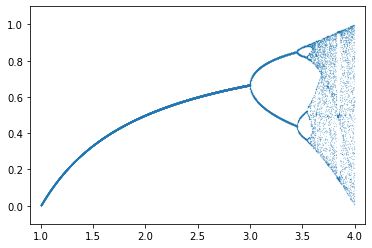

In [23]:
from pylab import show, scatter, xlim, ylim
from random import randint

iter = 1000         # Number of iterations per point
seed = 0.5          # Seed value for x in (0, 1)
spacing = .0001     # Spacing between points on domain (r-axis)
res = 8             # Largest n-cycle visible

# Initialize r and x lists
rlist = []
xlist = []

logisticmap = lambda x,r: r * x * (1 - x)

# Return nth iteration of logisticmap(x. r)
def iterate(n, x, r):

    for i in range(1,n):
        x = logisticmap(x, r)

    return x

# Generate list values -- iterate for each value of r
for r in [i * spacing for i in range(int(1/spacing),int(4/spacing))]:
   rlist.append(r) 
   xlist.append(iterate(randint(iter-res/2,iter+res/2), seed, r))

scatter(rlist, xlist, s = .01)
xlim(0.9, 4.1)
ylim(-0.1,1.1)
show()